In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
import numpy as np
import glob

from steered import SteeredVAE
from vae import VariationalAutoencoder

In [3]:
files = (glob.glob('Coll*/data/*/*/*/Pr*ta/*rec.tif'))

In [4]:
Xs = []
for file in files:
    im = io.imread(file)
    Xs.append(im)

In [5]:
Xs[0].shape

(461, 497, 461)

In [18]:
X = []
y = []
for x in Xs:
    im = x[150:300,::8,::7]
    _,xx,yy = im.shape
    fix_x = xx-60
    fix_y = yy-60
    if (fix_x%2==1):
        im = im[:,fix_x//2:-(fix_x//2+1)]
    elif (fix_x>0):
        im = im[:,fix_x//2:-(fix_x//2)]
    if (fix_y%2==1):
        im = im[:,:,fix_y//2:-(fix_y//2+1)]
    elif (fix_y>0):
        im = im[:,:,fix_y//2:-(fix_y//2)]
    X.append(im)
    y.append(np.arange(150,300))

In [19]:
X = np.concatenate((X))
y = np.concatenate((y))

In [22]:
X = X - X.min()
X = X/X.max()
# to homogenize the data a bit
X = np.sqrt(X)

y_m = y.mean(axis=0)
y_s = y.std(axis=0)
y = (y-y_m)/y_s

In [23]:
X_train = np.zeros((len(X),3600))

for i in range(len(X)):
    X_train[i] = X[i].flatten()

In [24]:
X_train.shape,y.shape

((2550, 3600), (2550,))

In [42]:
vae = SteeredVAE(3600, [1024,64],1,y_weight=10)

In [67]:
vae.steer(X_train,y.reshape(-1,1),batch=10,epochs=10)

Epoch: 1
Cost: -6072715.876953125 260.33023793110624
Epoch: 2
Cost: -6072113.615234375 260.2324069351889
Epoch: 3
Cost: -6070883.685546875 260.10468197613955
Epoch: 4
Cost: -6069643.6328125 259.82508924184367
Epoch: 5
Cost: -6069382.865234375 259.93813647702336
Epoch: 6
Cost: -6068018.63671875 260.2680416251533
Epoch: 7
Cost: -6067698.720703125 260.513996578753
Epoch: 8
Cost: -6067135.107421875 259.8959597777575
Epoch: 9
Cost: -6066849.443359375 259.8524756236002
Epoch: 10
Cost: -6066550.294921875 260.2363788317889


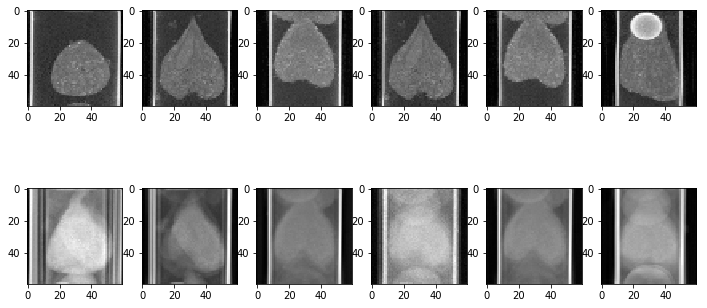

In [70]:
fig,ax = plt.subplots(ncols=6,nrows=2,figsize=(12,6))

for i in range(6):
    idx = np.random.randint(len(X_train))
    ax[0,i].imshow(X_train[idx].reshape(60,60),cmap='gray')
    ae = vae.predict(X_train[idx:idx+1])[0]
    ax[1,i].imshow(ae.reshape(60,60),cmap='gray')
plt.show()

In [48]:
va = VariationalAutoencoder(3600,[1024,64])

In [68]:
va.fit(X_train,batch=10)

Epoch: 1
Cost: -6071434.02734375
Epoch: 2
Cost: -6070052.73046875
Epoch: 3
Cost: -6068565.212890625
Epoch: 4
Cost: -6066319.40234375
Epoch: 5
Cost: -6065592.146484375
Epoch: 6
Cost: -6065430.853515625
Epoch: 7
Cost: -6063662.529296875
Epoch: 8
Cost: -6064225.892578125
Epoch: 9
Cost: -6062330.64453125
Epoch: 10
Cost: -6061236.03125


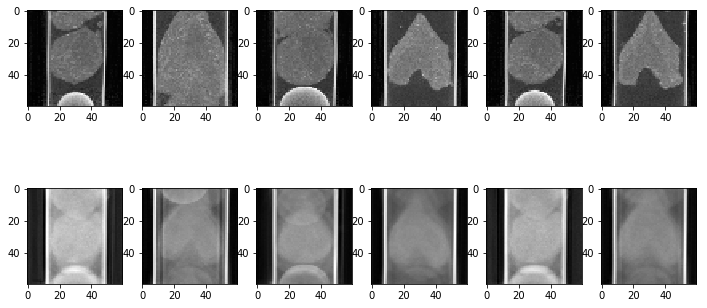

In [71]:
fig,ax = plt.subplots(ncols=6,nrows=2,figsize=(12,6))

for i in range(6):
    idx = np.random.randint(len(X_train))
    ax[0,i].imshow(X_train[idx].reshape(60,60),cmap='gray')
    ae = va.predict(X_train[idx:idx+1])
    ax[1,i].imshow(ae.reshape(60,60),cmap='gray')
plt.show()

In [72]:
genS = vae.generate(4)
genN = va.generate(4)

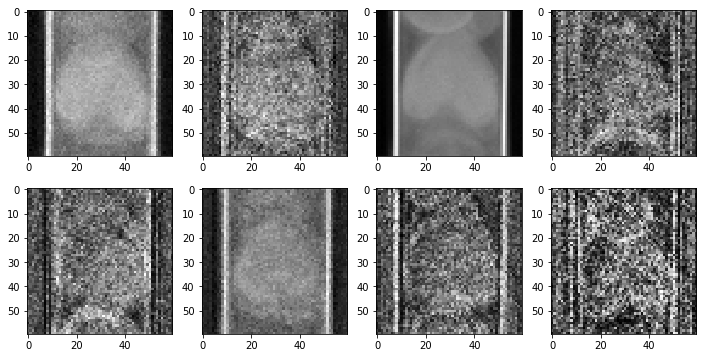

In [73]:
fig,ax = plt.subplots(ncols=4,nrows=2,figsize=(12,6))

for i in range(4):
    ax[0,i].imshow(genS[i].reshape(60,60),cmap='gray')
    ax[1,i].imshow(genN[i].reshape(60,60),cmap='gray')
plt.show()